## Simple Linear Regression

Here we will try to see that if we can make a regression model to predict one column of a dataset by the use of other coloumn.
Dataset
Population of U.S. Cities
## Description
The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.
## Format
This data frame contains the following columns:
u The 1920 population.
x The 1930 population.
There is one unnamed column also in this dataset. Please remove and ignore that coloumn.
Source
The data were obtained from
Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley
References
Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.


## Question 1 Read the dataset given in file named 'bigcity.csv'.
## And check the dataset for any missing values and also print out the correlation matrix

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bigcity = pd.read_csv('bigcity.csv')

In [4]:
bigcity.isnull().sum()
bigcity.isna().sum()
bigcity.corr()

Unnamed: 0    0
u             0
x             0
dtype: int64

Unnamed: 0    0
u             0
x             0
dtype: int64

,Unnamed: 0,u,x
Unnamed: 0,1.000000,-0.024788,-0.047890
u,-0.024788,1.000000,0.981742
x,-0.047890,0.981742,1.000000


In [5]:
bigcity.head()
bigcity.columns

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


Index(['Unnamed: 0', 'u', 'x'], dtype='object')

The high correlation betwwen u and x indicates that the variable u can be a good predictor of variable x

## Question 2 - Transform the dataset and Split data into train, test sets.
Find the number of rows in given dataset and separate the input(u column)  and target variables(x column) into X and Y.

Remove the unnamed coloumn.

Hint: You can shape function to get the size of the dataframe.
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [6]:
bigcity.shape
bigcity.size

(49, 3)

147

In [7]:
bigcity = bigcity.drop(columns='Unnamed: 0')

In [8]:
X = bigcity.iloc[:,0:1]
Y = bigcity.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size =.80,random_state = 45)

/Users/jd/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
X_train.shape
Y_train.shape
Y_train.reshape(1,-1)
X_test.shape
Y_test.shape

(39, 1)

(39,)

array([[106, 464,  58,  58, 130,  64,  54,  77,  61, 232, 105,  63, 139,
        634, 288,  52, 291,  67, 113, 142,  50,  80, 115,  89,  79,  65,
         64, 111, 317, 104,  93,  75, 183,  57,  46,  53, 260,  85,  53]])

(10, 1)

(10,)


## Question 3 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regressor = LinearRegression()

In [14]:
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
print ("Cofficients B0",regressor.coef_)
print ("Intercept  B1 is",regressor.intercept_)

Cofficients B0 [1.17565438]
Intercept  B1 is 5.170017212883977


## Question 4 - Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.
Hint - y = mx + c, plot y

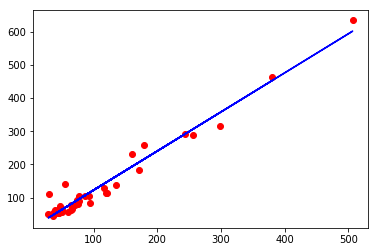

In [16]:
plt.scatter(X_train,Y_train,color = 'red')
plt.plot(X_train,regressor.predict(X_train),color = 'blue')
plt.show()

/Users/jd/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


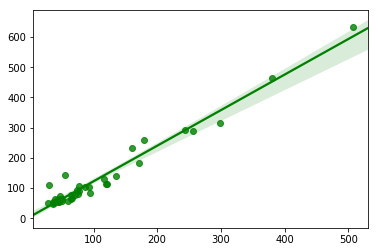

In [17]:
sns.regplot(X_train,Y_train,color='green')

## Question 5 - Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. 
Performing root operation over mean square error over mean square error gives you root mean square error

In [18]:
from math import sqrt

In [19]:
Y_pred = regressor.predict(X_test)

In [20]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(Y_test,regressor.predict(X_test))
print ("RMSE = ",sqrt(error))

RMSE =  18.77793320029306


In [21]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

from sklearn.metrics import r2_score
print ("R2 error = ",r2_score(Y_test ,regressor.predict(X_test)))

R2 error =  0.9754597143590616


## Question 6 - Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [22]:
print ("Accuracy of model for train data  : ",regressor.score(X_train,Y_train))
print ("Accuracy of model for test data  : ",regressor.score(X_test,Y_test))

Accuracy of model for train data  :  0.9601892962586595
Accuracy of model for test data  :  0.9754597143590615


# Problem Statement



In [23]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

## Q7. Load the PIMA Indian Diabetes file into Python DataFrame. And print 10 samples from the dataset


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [24]:
prima_df=pd.read_csv("pima-indians-diabetes.csv")
prima_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [25]:
prima_df.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1


In [26]:
X = prima_df.iloc[:,0:8]
Y = prima_df.iloc[:,-1]

In [27]:
from random import sample
prima_df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
755,1,128,88,39,110,36.5,1.057,37,1
12,10,139,80,0,0,27.1,1.441,57,0
215,12,151,70,40,271,41.8,0.742,38,1
132,3,170,64,37,225,34.5,0.356,30,1
320,4,129,60,12,231,27.5,0.527,31,0
383,1,90,62,18,59,25.1,1.268,25,0
150,1,136,74,50,204,37.4,0.399,24,0
445,0,180,78,63,14,59.4,2.420,25,1
540,8,100,74,40,215,39.4,0.661,43,1
121,6,111,64,39,0,34.2,0.260,24,0


In [28]:
prima_df.shape
prima_df.size
prima_df.describe()
prima_df.info()

(768, 9)

6912

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
prima_df.groupby('Class').agg('count')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [30]:
prima_df.Glucose[prima_df.Glucose == 0].count()
prima_df.BloodPressure[prima_df.BloodPressure == 0].count()
prima_df.SkinThickness[prima_df.SkinThickness == 0].count()
prima_df.Insulin[prima_df.Insulin == 0].count()
prima_df.BMI[prima_df.BMI == 0].count()

5

35

227

374

11

there are 768 people with an uneven distribution of the outcome healthy:sick = 500:268. There are also some missing values '0' for the variables 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI'

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

## Q8 Print the datatypes of each column and the shape of the dataset. And replace all the 0s in the column with the median of the same column value accordingly.

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


In [31]:
prima_df.shape

(768, 9)

In [32]:
glucose_med = prima_df["Glucose"].median(skipna=True)   # find the median of the plasma column among the inliers
print (glucose_med)

prima_df["Glucose"]=prima_df["Glucose"].replace({'Glucose': {0: glucose_med}})    # replace the 0 plasma values in the original data with the median of plasma
print (prima_df["Glucose"])

BloodPressure_med = prima_df["BloodPressure"].median(skipna=True)  
print (glucose_med)

prima_df["Glucose"]=prima_df["BloodPressure"].replace({'BloodPressure': {0: BloodPressure_med}})    
Insulin_med = prima_df["Insulin"].median(skipna=True)

prima_df["Insulin"]=prima_df["Insulin"].replace({'Insulin': {0: Insulin_med}})    
print (prima_df["Insulin"])
BMI_med = prima_df["BMI"].median(skipna=True)

prima_df["BMI"]=prima_df["BMI"].replace({'BMI': {0: BMI_med}})    
print (prima_df["BMI"])

117.0
0      148
1       85
2      183
3       89
4      137
5      116
6       78
7      115
8      197
9      125
10     110
11     168
12     139
13     189
14     166
15     100
16     118
17     107
18     103
19     115
20     126
21      99
22     196
23     119
24     143
25     125
26     147
27      97
28     145
29     117
      ... 
738     99
739    102
740    120
741    102
742    109
743    140
744    153
745    100
746    147
747     81
748    187
749    162
750    136
751    121
752    108
753    181
754    154
755    128
756    137
757    123
758    106
759    190
760     88
761    170
762     89
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64
117.0
0        0
1        0
2        0
3       94
4      168
5        0
6       88
7        0
8      543
9        0
10       0
11       0
12       0
13     846
14     175
15       0
16     230
17       0
18      83
19      96
20     235
21       0
22       0
23       0
24     146
2

## Q9 See the distribution of 'Class' variable and plot it using appropriate graph.

## Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

Using the plot - infer the relationship between different variables

/Users/jd/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/jd/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/jd/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/jd/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


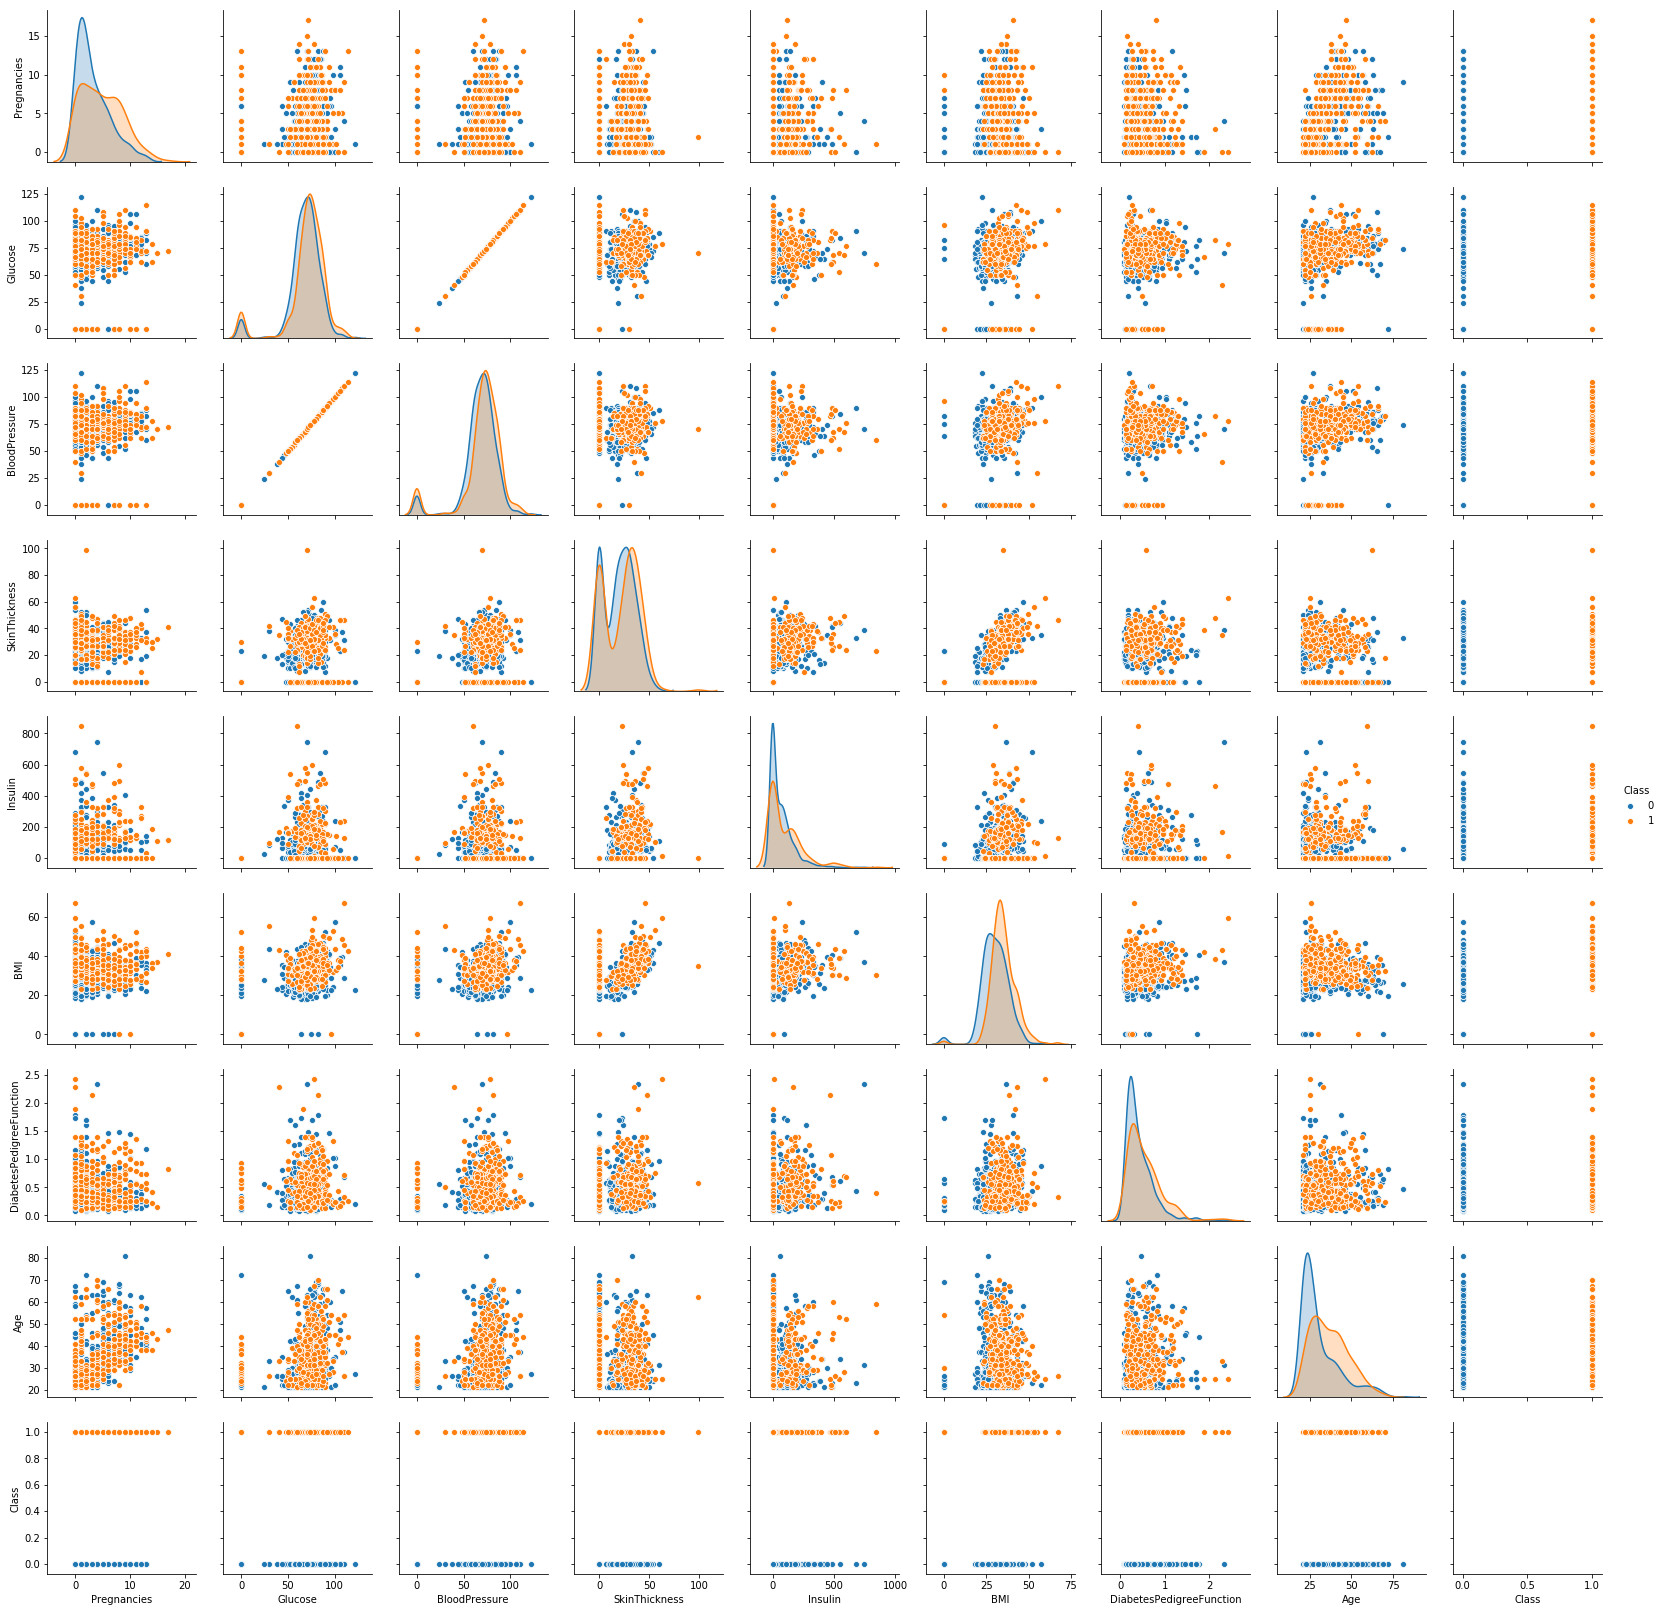

In [33]:
import seaborn as sns
sns.pairplot(prima_df,diag_kind='kde',hue='Class')

Pregnancies:I see that it is a Gaussian Distribution, no major outliers are observed in this data, the two classes are having the overlapping central tendencies
Glucose: I observe that there are some outliers in the dataset, as I see a cluttered Gaussian on the left on the major Gaussian
BloodPressure:  I observe that there are some outliers in the dataset, as I see a cluttered Gaussian on the left on the major Gaussian
Skin Thickness: Has two major Gaussians and on the top of that both the classes have central tendencies
overlapping each other
The other variables like Insulin and the left over variables, also follow the same trend
The Observation that I have is that even before I start building on a model, it would 
be very difficult to a do a classification problem on this dataset as the classes are more packed to each other

## Q10 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test). And create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.


In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

In [35]:
model=DecisionTreeClassifier(criterion = 'entropy')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Q11 Print the accuracyof the model and print the confusion matrix.

In [36]:
ypred=model.predict(xtest)


In [37]:
ytest
ypred

661    1
122    0
113    0
14     1
529    0
103    0
338    1
588    1
395    0
204    0
31     1
546    1
278    0
593    0
737    0
202    0
175    1
55     0
479    0
365    0
417    1
577    1
172    0
352    0
27     0
605    0
239    0
744    0
79     0
496    0
      ..
511    0
35     0
473    0
255    1
534    0
77     0
566    0
312    1
465    0
109    1
553    0
299    0
101    0
315    0
92     0
243    1
397    1
294    0
504    0
400    1
367    0
755    1
231    1
211    0
436    0
165    1
188    1
334    0
758    0
34     0
Name: Class, Length: 231, dtype: int64

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [38]:
acc=metrics.accuracy_score(ytest,ypred)
print(acc)

0.7012987012987013


Print the feature importance of the decision model - Optional

In [39]:
cm=metrics.confusion_matrix(ytest,ypred)
print(cm)

[[124  33]
 [ 36  38]]


In [40]:
model2=DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
ypred2=model2.predict(xtest)

In [42]:
acc2=metrics.accuracy_score(ytest,ypred2)
print(acc2)

0.7575757575757576


In [43]:
cm2=metrics.confusion_matrix(ytest,ypred2)
print(cm2)

[[129  28]
 [ 28  46]]


## Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
Rf_model = RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0 )

In [46]:
Rf_model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [47]:
y_predict_Rf=Rf_model.predict(xtest)

In [48]:
Rf_acc=metrics.accuracy_score(ytest,y_predict_Rf)
print(Rf_acc)

0.7662337662337663


## Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [49]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=model2,n_estimators= 51)
abcl.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=51, random_state=None)

In [50]:
y_pred_boost=abcl.predict(xtest)

In [51]:
metrics.accuracy_score(ytest,y_pred_boost)

0.7705627705627706

## Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [52]:
from sklearn.ensemble import BaggingClassifier
#Default base estimator is Decision Tree (CART)

bgcl = BaggingClassifier(base_estimator=model2,n_estimators=51)
bgcl.fit(xtrain,ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [53]:
ypred3= bgcl.predict(xtest)

In [54]:
acc=metrics.accuracy_score(ytest,ypred3)
acc*100

74.89177489177489

## Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(xtrain,ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [56]:
y_predict_gb=gbcl.predict(xtest)



In [57]:
metrics.accuracy_score(ytest,y_predict_gb)

0.7835497835497836

Area Under the curve 0.722886899638492


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.0)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

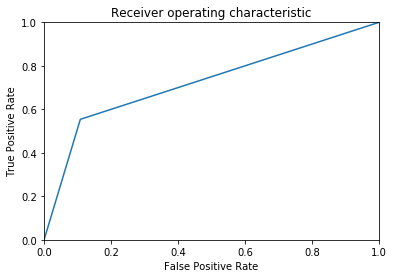

In [58]:
fpr,tpr, _ = roc_curve(ytest,y_predict_gb)
roc_auc = auc(fpr, tpr)

print('Area Under the curve',roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.